In [1696]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime

# Data Preprocessing

In [1697]:
# loading the data from csv file to pandas dataframe

from google.colab import drive
drive.mount('/content/drive')
car_dataset = pd.read_csv('/content/drive/MyDrive/car data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1698]:
# inspecting the first 5 rows of the dataframe

car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [1699]:
# checking the number of rows and columns

car_dataset.shape

(301, 9)

In [1700]:
# getting some information about the dataset

car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [1701]:
# checking the number of missing values

car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [1702]:
# checking the distribution of categorical data

print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [1703]:
# Creating a new column Age

date_time = datetime.datetime.now()
car_dataset['Age']=date_time.year - car_dataset['Year']
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [1704]:
# Dropping the Year column

car_dataset.drop('Year',axis=1,inplace=True)
car_dataset.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [1705]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to 'Fuel_Type'
car_dataset['Fuel_Type'] = label_encoder.fit_transform(car_dataset['Fuel_Type'])

# Apply label encoding to 'Seller_Type'
car_dataset['Seller_Type'] = label_encoder.fit_transform(car_dataset['Seller_Type'])

# Apply label encoding to 'Transmission'
car_dataset['Transmission'] = label_encoder.fit_transform(car_dataset['Transmission'])

# Display the updated dataframe
print(car_dataset)

    Car_Name  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0       ritz           3.35           5.59       27000          2   
1        sx4           4.75           9.54       43000          1   
2       ciaz           7.25           9.85        6900          2   
3    wagon r           2.85           4.15        5200          2   
4      swift           4.60           6.87       42450          1   
..       ...            ...            ...         ...        ...   
296     city           9.50          11.60       33988          1   
297     brio           4.00           5.90       60000          2   
298     city           3.35          11.00       87934          2   
299     city          11.50          12.50        9000          1   
300     brio           5.30           5.90        5464          2   

     Seller_Type  Transmission  Owner  Age  
0              0             1      0   10  
1              0             1      0   11  
2              0             1      

In [1706]:
car_dataset.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,2,0,1,0,10
1,sx4,4.75,9.54,43000,1,0,1,0,11
2,ciaz,7.25,9.85,6900,2,0,1,0,7
3,wagon r,2.85,4.15,5200,2,0,1,0,13
4,swift,4.60,6.87,42450,1,0,1,0,10


In [1707]:
# Splitting the data and Target

X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [1708]:
print(X)

     Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner  \
0             5.59       27000          2            0             1      0   
1             9.54       43000          1            0             1      0   
2             9.85        6900          2            0             1      0   
3             4.15        5200          2            0             1      0   
4             6.87       42450          1            0             1      0   
..             ...         ...        ...          ...           ...    ...   
296          11.60       33988          1            0             1      0   
297           5.90       60000          2            0             1      0   
298          11.00       87934          2            0             1      0   
299          12.50        9000          1            0             1      0   
300           5.90        5464          2            0             1      0   

     Age  
0     10  
1     11  
2      7  
3     1

In [1709]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [1710]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

# **1. Linear Regression Model**

In [1711]:
# loading the linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [1712]:
y_predict_linear_r = lin_reg_model.predict(X_test)

In [1713]:
## Evaluating Linear Regression model
linear_r_mse = mean_squared_error(Y_test, y_predict_linear_r)
linear_r_mae = mean_absolute_error(Y_test, y_predict_linear_r)
linear_r_score = metrics.r2_score(Y_test, y_predict_linear_r)

In [1714]:
print("Linear Regression Model:")
print("Mean Squared Error:", linear_r_mse)
print("Mean Absolute Error:", linear_r_mae)
print("R-squared Score:", linear_r_score)

Linear Regression Model:
Mean Squared Error: 2.1501299189863534
Mean Absolute Error: 1.1516382156622778
R-squared Score: 0.836576671502498


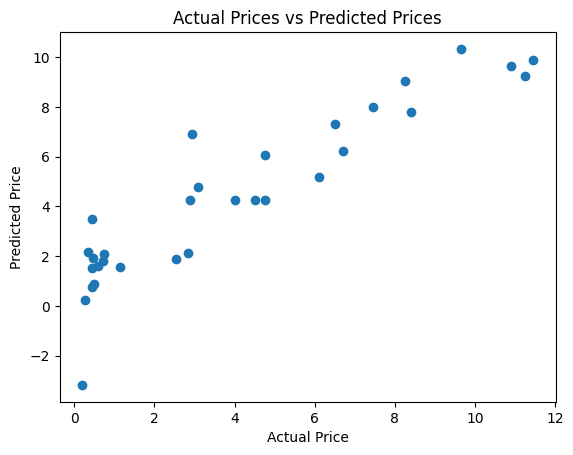

In [1715]:
plt.scatter(Y_test, y_predict_linear_r)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

# **2. Lasso Regression Model**

In [1716]:
# loading the lasso regression model
lass_reg_model = Lasso()
lass_reg_model.fit(X_train, Y_train)

Lasso()

In [1717]:
y_predict_lasso_r = lass_reg_model.predict(X_test)

In [1718]:
## Evaluating Lasso Regression model
lasso_r_mse = mean_squared_error(Y_test, y_predict_lasso_r)
lasso_r_mae = mean_absolute_error(Y_test, y_predict_lasso_r)
lasso_r_score = metrics.r2_score(Y_test, y_predict_lasso_r)

In [1719]:
print("Lasso Regression Model:")
print("Mean Squared Error:", lasso_r_mse)
print("Mean Absolute Error:", lasso_r_mae)
print("R-squared Score:", lasso_r_score)

Lasso Regression Model:
Mean Squared Error: 1.698345130931681
Mean Absolute Error: 1.0507466679706965
R-squared Score: 0.8709151424834702


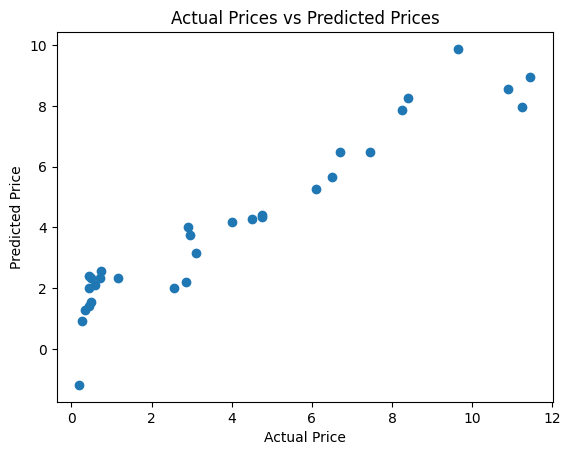

In [1720]:
plt.scatter(Y_test, y_predict_lasso_r)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

# **Predictive Modelling Evaluation- 2**



In [1721]:
# Apply Min-Max scaling
import copy
car_dataset_MinMaxScaled = copy.deepcopy(car_dataset)

# Initializing Min Max Scaler

scaler = MinMaxScaler()
car_dataset_MinMaxScaled[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age']] = scaler.fit_transform(car_dataset_MinMaxScaled[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age']])


# Splitting the data and Target

X = car_dataset_MinMaxScaled.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset_MinMaxScaled['Selling_Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

# **1. Random Forest Regressor Model**

In [1722]:
# loading the Random Forest Regressor model

rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [1723]:
y_predict_rf = rf.predict(X_test)

In [1724]:
## Evaluating Random Forest Regressor model

rf_mse = mean_squared_error(Y_test, y_predict_rf)
rf_mae = mean_absolute_error(Y_test, y_predict_rf)
rf_score = metrics.r2_score(Y_test,y_predict_rf)

In [1725]:
print("Random Forest Regressor:")
print("Mean Squared Error:", rf_mse)
print("Mean Absolute Error:", rf_mae)
print("R-squared Score:", rf_score)

Random Forest Regressor:
Mean Squared Error: 0.0008596436057148302
Mean Absolute Error: 0.019028136596364306
R-squared Score: 0.9545462149104811


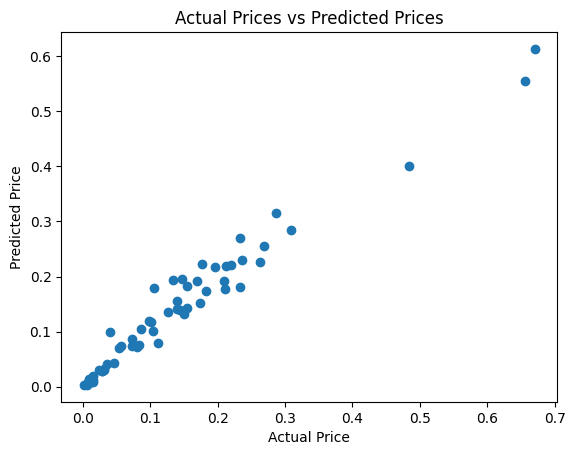

In [1726]:
plt.scatter(Y_test, y_predict_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

# **2. Decision Tree Regressor Model**

In [1727]:
# loading the Decision Tree Regressor model

dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)


DecisionTreeRegressor()

In [1728]:
y_predict_dt = dt.predict(X_test)


In [1729]:
## Evaluating Decision Tree Regressor model

dt_mse = mean_squared_error(Y_test, y_predict_dt)
dt_mae = mean_absolute_error(Y_test, y_predict_dt)
dt_score = metrics.r2_score(Y_test,y_predict_dt)


In [1730]:
print("Decision Tree Regressor:")
print("Mean Squared Error:", dt_mse)
print("Mean Absolute Error:", dt_mae)
print("R-squared Score:", dt_score)

Decision Tree Regressor:
Mean Squared Error: 0.0010674237378061314
Mean Absolute Error: 0.02177180703649773
R-squared Score: 0.9435598091405034


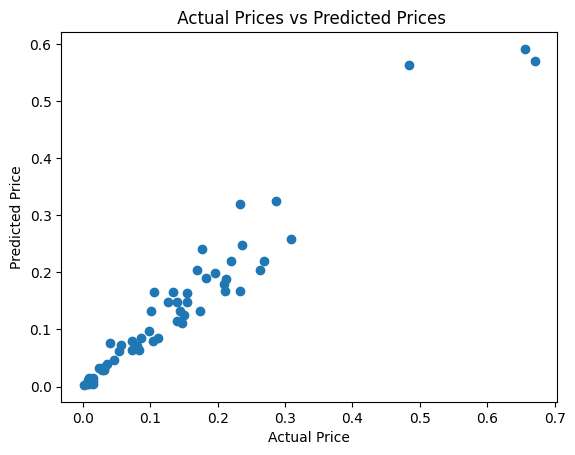

In [1731]:
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.scatter(Y_test, y_predict_dt)
plt.show()

In [1732]:
final_data = pd.DataFrame({'MODELS':['Random Forest', 'Decision Tree', 'Linear Regression', 'Lasso Regression'],
                           'R2_SCORE': [rf_score, dt_score, linear_r_score, lasso_r_score],
                           'Mean_squared_error': [rf_mse, dt_mse, linear_r_mse, lasso_r_mse],
                           'Mean_absolute_error': [rf_mae, dt_mae, linear_r_mae, lasso_r_mae]
                           })
final_data

,MODELS,R2_SCORE,Mean_squared_error,Mean_absolute_error
0,Random Forest,0.954546,0.000860,0.019028
1,Decision Tree,0.943560,0.001067,0.021772
2,Linear Regression,0.836577,2.150130,1.151638
3,Lasso Regression,0.870915,1.698345,1.050747


<ipython-input-1733-6c62c527c9e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_data['MODELS'], y=final_data['R2_SCORE'], palette=colors)
<ipython-input-1733-6c62c527c9e6>:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=final_data['MODELS'], y=final_data['R2_SCORE'], palette=colors)


<Axes: xlabel='MODELS', ylabel='R2_SCORE'>

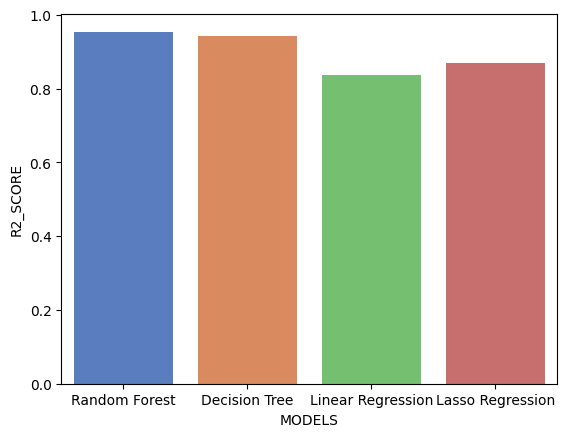

In [1733]:
colors = sns.color_palette('muted')
sns.barplot(x=final_data['MODELS'], y=final_data['R2_SCORE'], palette=colors)

# **3. K Means Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

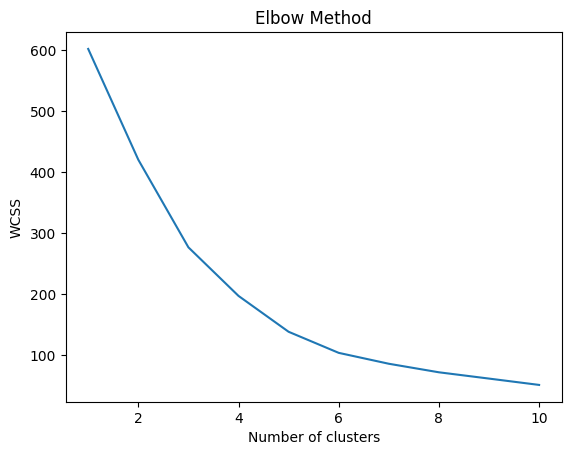

In [1734]:
# Initialize StandardScaler

from sklearn.preprocessing import StandardScaler
import copy
car_dataset_StandardScaler = copy.deepcopy(car_dataset)
scaler = StandardScaler()

# Fit and transform the specified columns

columns_to_scale = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age']
car_dataset_StandardScaler[columns_to_scale] = scaler.fit_transform(car_dataset_StandardScaler[columns_to_scale])
car_data_kmeans = car_dataset_StandardScaler[["Kms_Driven", "Selling_Price"]]

# Using Elbow Method to find the optimal number of clusters (K)

wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(car_data_kmeans)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow curve

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [1735]:
# From the elbow curve, the optimal value of K=3

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_predict_kmeans = kmeans.fit_predict(car_data_kmeans)
car_data_kmeans['cluster'] = y_predict_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-1735-5b00bfeac81c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_data_kmeans['cluster'] = y_predict_kmeans


In [1736]:
# Inspect the resulting clusters

print(car_data_kmeans.head())


   Kms_Driven  Selling_Price  cluster
0   -0.256224      -0.258416        1
1    0.155911       0.017481        1
2   -0.773969       0.510154        1
3   -0.817758      -0.356950        1
4    0.141743      -0.012079        1


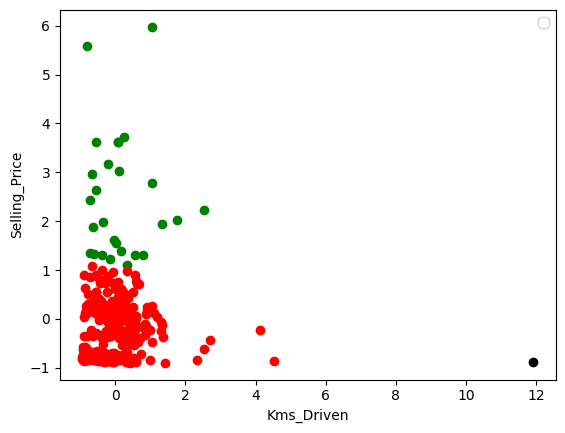

In [1737]:
car_data_kmeans1 = car_data_kmeans[car_data_kmeans.cluster==0]
car_data_kmeans2 = car_data_kmeans[car_data_kmeans.cluster==1]
car_data_kmeans3 = car_data_kmeans[car_data_kmeans.cluster==2]

plt.scatter(car_data_kmeans1['Kms_Driven'], car_data_kmeans1['Selling_Price'], color='green')
plt.scatter(car_data_kmeans2['Kms_Driven'], car_data_kmeans2['Selling_Price'], color='red')
plt.scatter(car_data_kmeans3['Kms_Driven'], car_data_kmeans3['Selling_Price'], color='black')

plt.xlabel('Kms_Driven')
plt.ylabel('Selling_Price')
plt.legend()

In [1738]:
# Print the centroids of each cluster
print("Cluster Centroids:")
print(kmeans.cluster_centers_)


Cluster Centroids:
[[ 0.136834    2.46894794]
 [-0.05722357 -0.24093956]
 [11.92751541 -0.88509576]]


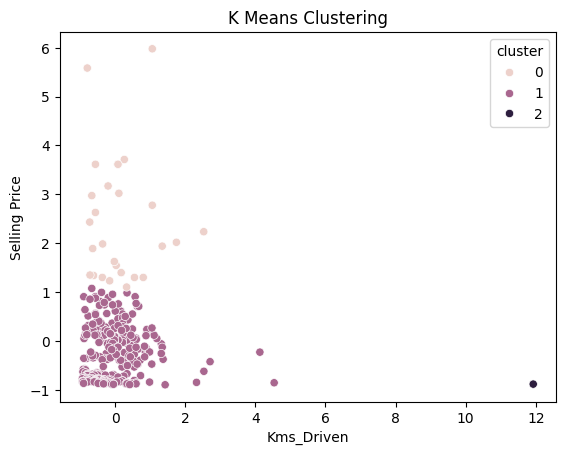

In [1739]:
# Visualize the clusters
sns.scatterplot(x='Kms_Driven', y='Selling_Price', hue='cluster', data=car_data_kmeans)
plt.title('K Means Clustering')
plt.xlabel('Kms_Driven')
plt.ylabel('Selling Price')
plt.show()

In [1740]:
from sklearn.metrics import silhouette_score
silhouette_score(car_data_kmeans[['Kms_Driven','Selling_Price']], kmeans.labels_)

0.5989802377586134